<a href="https://colab.research.google.com/github/milanajudiya/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Mount the drive

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_excel("/content/drive/MyDrive/Customer Segmentation - Milan Ajudiya/Online Retail.xlsx")

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [45]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [46]:
df.shape

(541909, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Description and CustomerID column as null values.

In [48]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
df_orcs = df.copy()

In [50]:
# calculate the null value in percentage in the all features

df_null = round((df_orcs.isnull().sum())/len(df_orcs)*100,2)

In [51]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

CustomerID has 24% null values.

#### drop the row which has missing values because customerID is unique.

In [52]:
# drop the row which has missing values
df_orcs = df_orcs.dropna()


####shape of the datset after droping the null valses

In [53]:
df_orcs.shape

(406829, 8)

####In InvoiceNo column some No's start with "C" that indicate Canceled transaction so drop that all.

In [54]:
# convert Invoice number column to strig datatype
df_orcs["InvoiceNo"] = df_orcs["InvoiceNo"].astype("str")

In [55]:
# drop the InvoiceNo which is start with "c"
df_orcs  = df_orcs[~df_orcs["InvoiceNo"].str.contains("C")]

In [56]:
# shape of the dataset
df_orcs.shape

(397924, 8)

In [57]:
df_orcs.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## **Exploratory Data Analysis**

In [58]:
df_description = df_orcs["Description"].value_counts().reset_index()
df_description.rename(columns={"index" : "product description", "Description" : "counts"},inplace=True)
df_description.head()

,product description,counts
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [59]:
df_description.tail()

,product description,counts
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Top 5 product description')

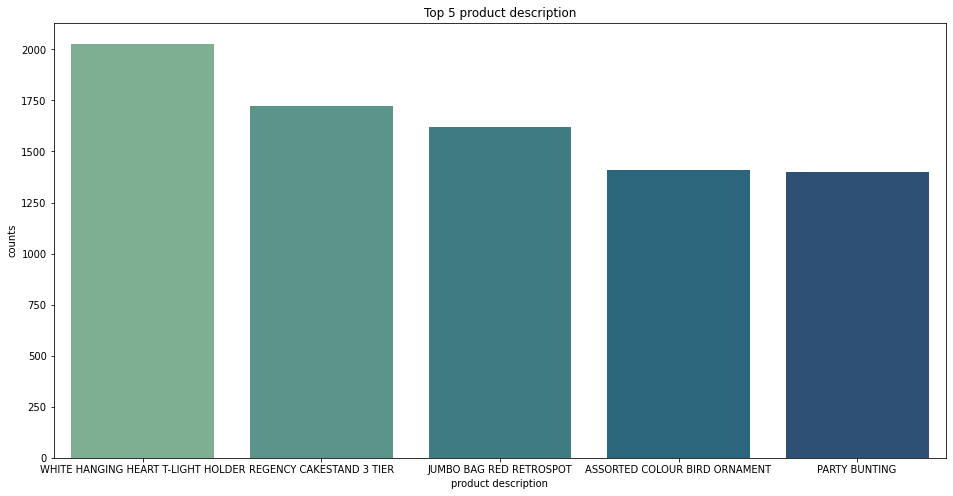

In [60]:
plt.figure(figsize=(16,8))
sns.barplot(x= "product description" , y="counts",palette = "crest", data=df_description[:5])
plt.title("Top 5 product description")

### **Top 5 product :**
1 . WHITE HANGING HEART T-LIGHT HOLDER	
2 .	REGENCY CAKESTAND 3 TIER	
3 .	JUMBO BAG RED RETROSPOT	
4 .	ASSORTED COLOUR BIRD ORNAMENT	
5 .	PARTY BUNTING	

Text(0.5, 1.0, 'Bottom 5 product description')

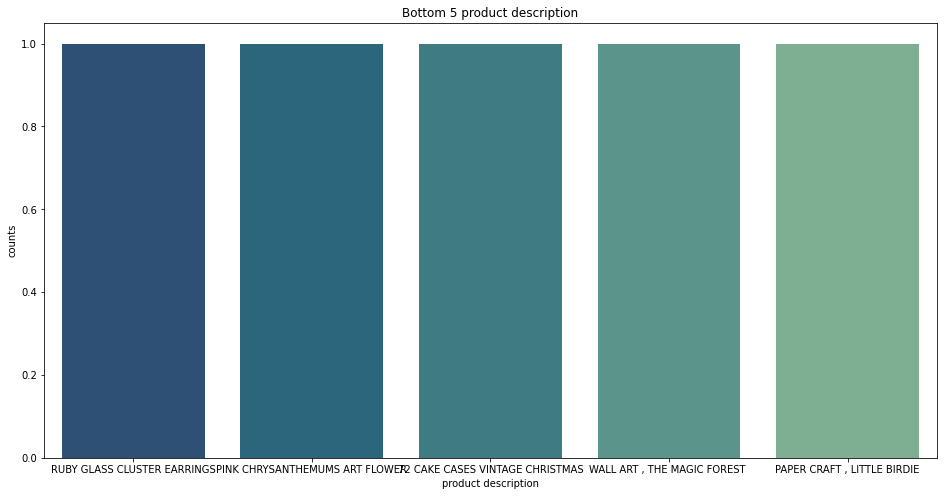

In [61]:
plt.figure(figsize=(16,8))
sns.barplot(x= "product description" , y="counts",palette = "crest_r", data=df_description[-5:])
plt.title("Bottom 5 product description")

### **Bottom 5 Products:**
RUBY GLASS CLUSTER EARRINGS	
PINK CHRYSANTHEMUMS ART FLOWER	
72 CAKE CASES VINTAGE CHRISTMAS	
WALL ART , THE MAGIC FOREST	
PAPER CRAFT , LITTLE BIRDIE	

In [62]:
df_orcs.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [63]:
df_country = df_orcs["Country"].value_counts().reset_index()
df_country.rename(columns={"index" : "Country name", "Country" : "counts"},inplace=True)
df_country.head()

,Country name,counts
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [64]:
df_country.tail()

,Country name,counts
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


Text(0.5, 1.0, 'Top 5 country based on the most number of customer')

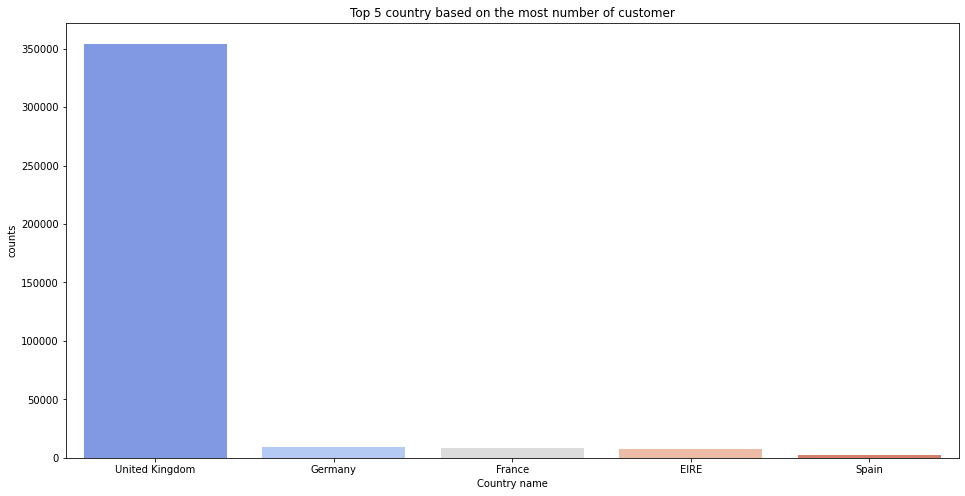

In [65]:
plt.figure(figsize=(16,8))
sns.barplot(x= "Country name" , y="counts",palette = "coolwarm", data=df_country[:5])
plt.title("Top 5 country based on the most number of customer")

### From graph we can see that most of the customer is from United Kingdom , then germany, France, ireland, spain.

Text(0.5, 1.0, 'bottom 5 country based on the most number of customer')

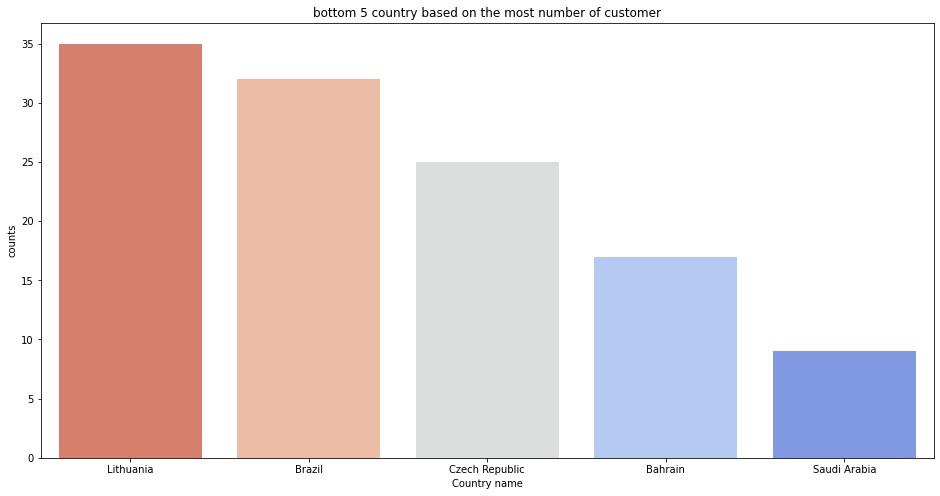

In [66]:
plt.figure(figsize=(16,8))
sns.barplot(x= "Country name" , y="counts", palette = "coolwarm_r", data=df_country[-5:])
plt.title("bottom 5 country based on the most number of customer")

Checking the distribution of numeric columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


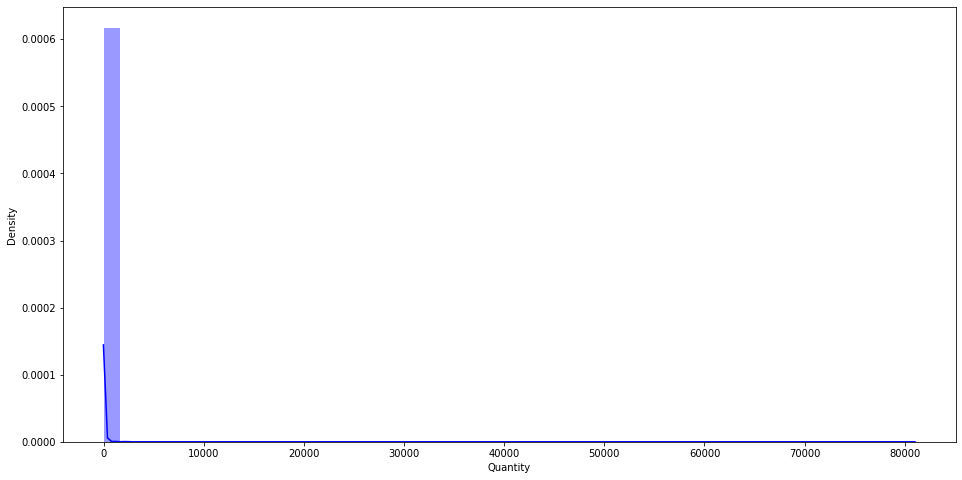

In [67]:
plt.figure(figsize=(16,8))
sns.distplot(df_orcs["Quantity"],color="Blue")

As see in graph the data is positively skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


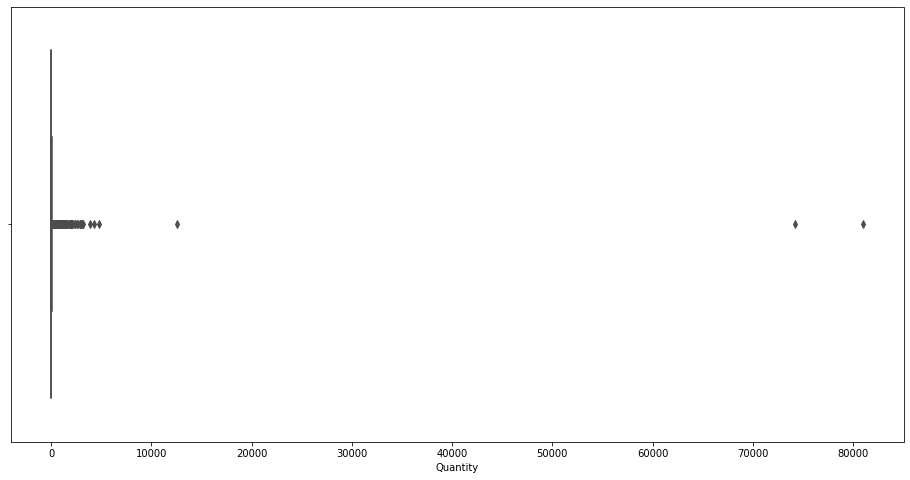

In [68]:
plt.figure(figsize=(16,8))
sns.boxplot(df_orcs["Quantity"],color="Blue")

As see in box plot there is some outliers in the quantity column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


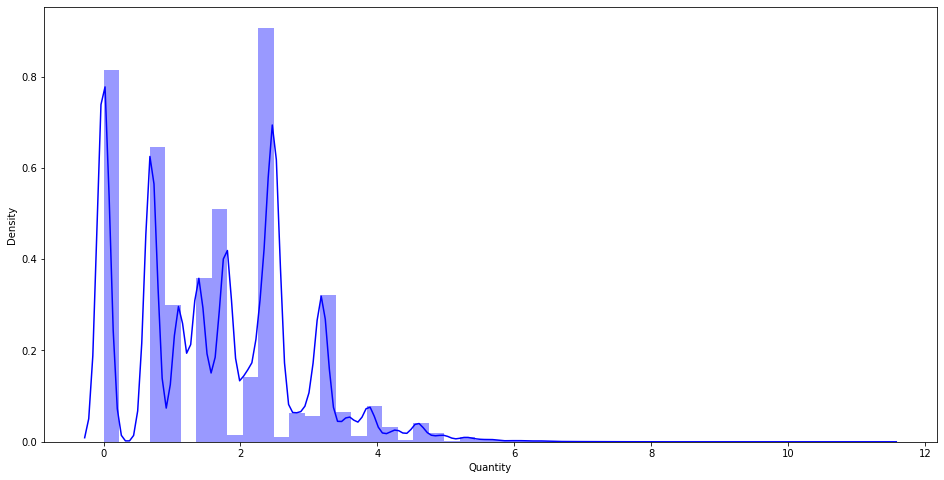

In [69]:
# apply log transformation on quantity column
plt.figure(figsize=(16,8))
sns.distplot(np.log(df_orcs["Quantity"]),color="Blue")

In [70]:
df_orcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


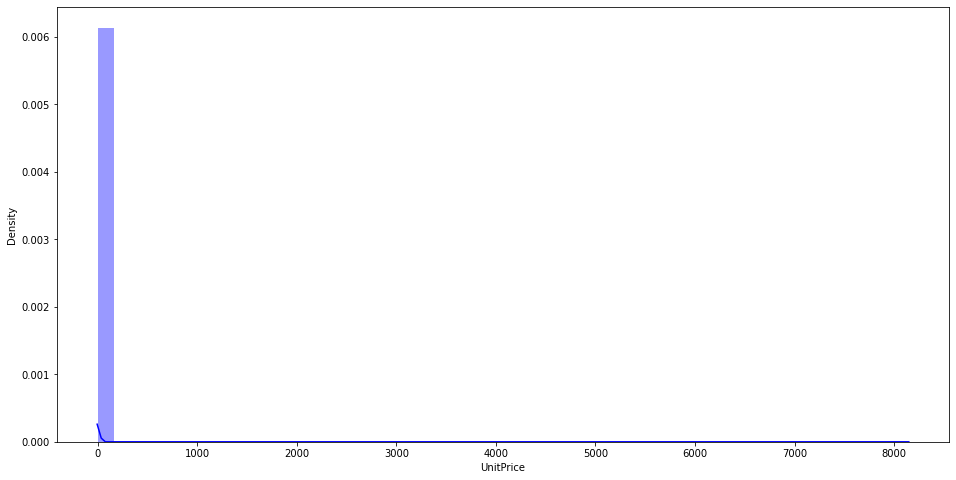

In [71]:
# checking the distribution of unitprice 
plt.figure(figsize=(16,8))
sns.distplot(df_orcs["UnitPrice"],color="Blue")

Unitprice data is also positive and skewed.

### **Feature engineering**

Add some features to explore

In [72]:
# extract year,month,day,hour and minute from invoicedate column
df_orcs["InvoiceDate"] = pd.to_datetime(df_orcs["InvoiceDate"] , format = "%d - %m - %y - %H - %M")

In [73]:
# extract day name from invoicedate column
df_orcs["day_name"] = df_orcs["InvoiceDate"].dt.day_name()

In [74]:
df_orcs["month"] = df_orcs["InvoiceDate"].dt.month
df_orcs["hour"] = df_orcs["InvoiceDate"].dt.hour

In [77]:
df_day_name = df_orcs["day_name"].value_counts().reset_index()
df_day_name.rename(columns={"index" : "day name", "day_name" : "counts"},inplace=True)
df_day_name

,day name,counts
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


Text(0.5, 1.0, 'day name')

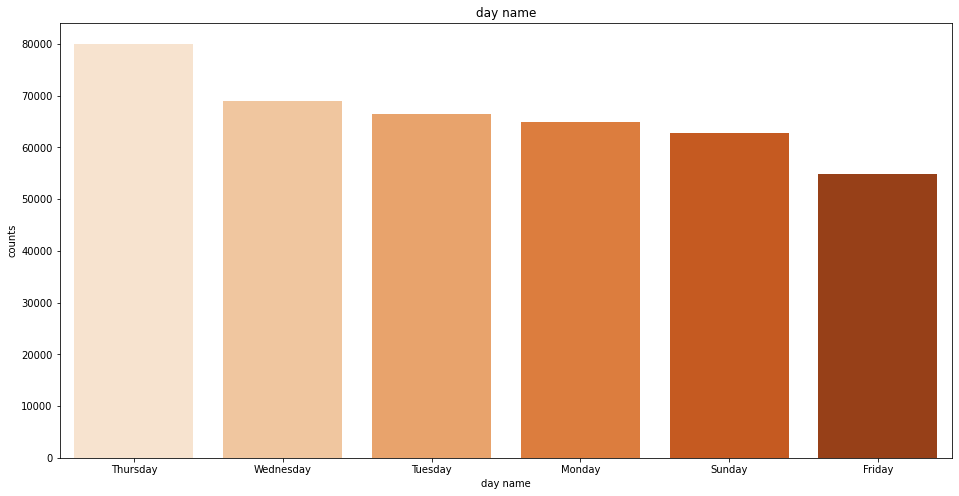

In [84]:
plt.figure(figsize=(16,8))
sns.barplot(x= "day name" , y="counts",palette = "Oranges", data=df_day_name)
plt.title("day name")

Most of the customers are like to shop on thuesday then as see in graph then after thursday the shopping is decreses noth next days.

In [85]:
df_month = df_orcs["month"].value_counts().reset_index()
df_month.rename(columns={"index" : "month", "month" : "counts"},inplace=True)
df_month

,month,counts
0,11,64545
1,10,49557
2,12,43464
3,9,40030
4,5,28322
5,6,27185
6,3,27177
7,8,27013
8,7,26827
9,4,22644


Text(0.5, 1.0, 'month')

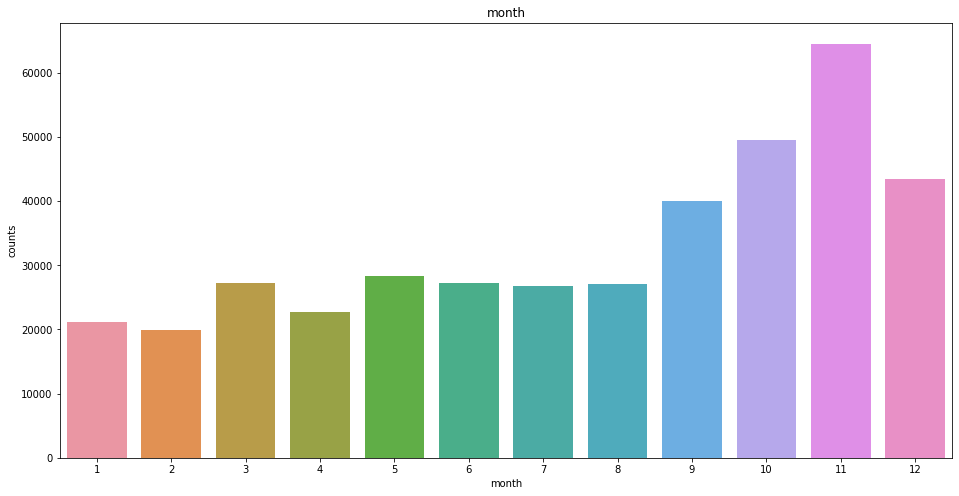

In [86]:
plt.figure(figsize=(16,8))
sns.barplot(x= "month" , y="counts", data=df_month)
plt.title("month")

As seen in graph that the shopping made by customer is increses sfter september month till december month, but the highest shopping is msde in nevember month.

In [87]:
df_hour = df_orcs["hour"].value_counts().reset_index()
df_hour.rename(columns={"index" : "hour", "hour" : "counts"},inplace=True)
df_hour

,hour,counts
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


Text(0.5, 1.0, 'hour')

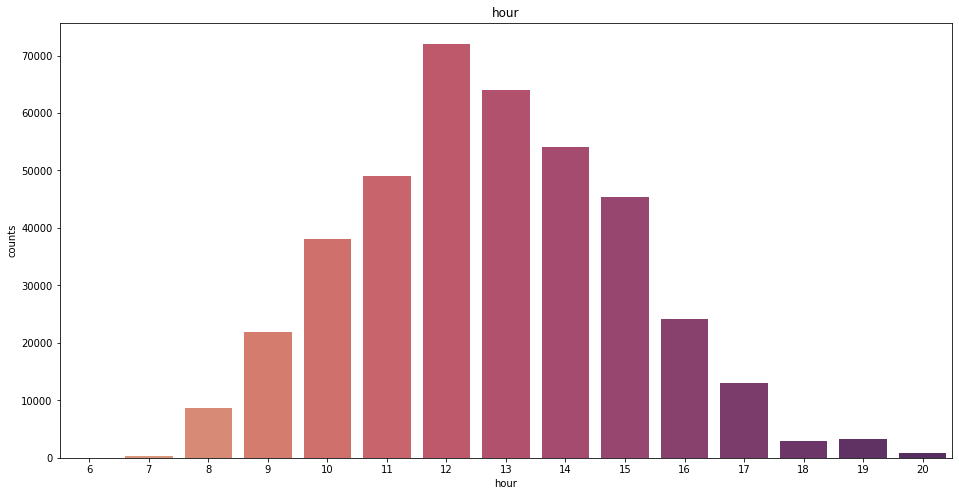

In [92]:
plt.figure(figsize=(16,8))
sns.barplot(x= "hour" , y="counts",palette= "flare",data=df_hour)
plt.title("hour")

As see in bar plot that highest purchases made at afternoot time by the customes.

## **Create the RFM model (Recency, Frequency, Monetary)**

###**Recency :** It stores the number of days the customer has sone his last purchase with respect to last date in the dataset. it is just to find the perticular customer is last purchased from store.

###**Frequency :** It is the number of time each customer has made a purchase by counting unique invoice date by esch customer while making a purchase.

###**Monetary :** It is the total amount spent by the customer.